This notebook shows examples of signals for time-frequency analysis. In particular STFT or Gabor Transforms. Developed by Prof. B. Hosseini.

Here's an interesting signal with varying frequency in time. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
  val = (3*np.sin(2*x) + 0.5*np.tanh(0.5*(x-3)) + 0.2*np.exp(-(x- 4)**2)
  + 1.5*np.sin(5*x) + 4*np.cos(3*(x-6)**2))/10 + (x/20)**3

  return val


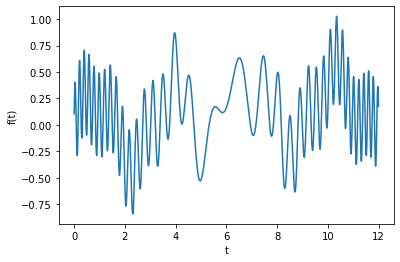

In [4]:
L = 12
N_grid = 2**11

grid = np.linspace(0, L, N_grid+1)
grid = grid[0:N_grid]

f_vals = f(grid)

# plotting f

plt.plot(grid, f_vals)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()


Let's consider the fft of this signal. 

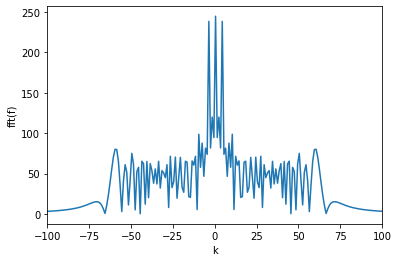

In [5]:
f_fft = np.fft.fftshift(np.fft.fft(f_vals))

freq_grid = np.linspace(- N_grid/2, N_grid/2, N_grid)

plt.plot(freq_grid, np.abs(f_fft))
plt.xlabel('k')
plt.ylabel('fft(f)')
plt.xlim(-100,100)
plt.show()


Now we break the signal into four pieces in the time domain and compute fft in each window. 

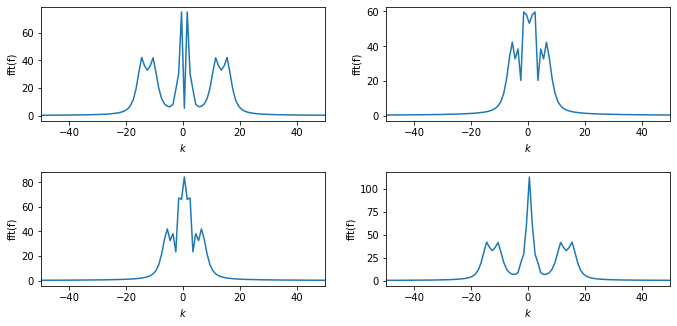

In [6]:
fig, (ax0, ax1) = plt.subplots(2,2, figsize=(10, 5))

fig.tight_layout(pad=3.0)

quarter_freq_grid = np.linspace(- N_grid/8, N_grid/8, int(N_grid/4))

ax0[0].plot(quarter_freq_grid, np.abs( np.fft.fftshift( np.fft.fft(f_vals[0:int(N_grid/4)]))) )
ax0[0].set_xlabel(r'$k$')
ax0[0].set_ylabel(r'fft(f)')
ax0[0].set_xlim(-50,50)

ax0[1].plot(quarter_freq_grid, np.abs(np.fft.fftshift( np.fft.fft(f_vals[int(N_grid/4):int(N_grid/2)]))) )
ax0[1].set_xlabel(r'$k$')
ax0[1].set_ylabel(r'fft(f)')
ax0[1].set_xlim(-50,50)

ax1[0].plot(quarter_freq_grid, np.abs(np.fft.fftshift( np.fft.fft(f_vals[int(N_grid/2):int(3*N_grid/4)]))) )
ax1[0].set_xlabel(r'$k$')
ax1[0].set_ylabel(r'fft(f)')
ax1[0].set_xlim(-50,50)


ax1[1].plot(quarter_freq_grid, np.abs(np.fft.fftshift( np.fft.fft(f_vals[int(3*N_grid/4):int(N_grid)]))) )
ax1[1].set_xlabel(r'$k$')
ax1[1].set_ylabel(r'fft(f)')
ax1[1].set_xlim(-50,50)

plt.show()

We now do something similar using a Gaussian filter. 

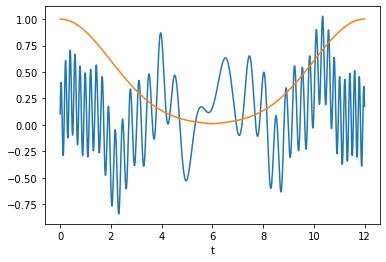

In [7]:
# define Gaussian window 

# note this is not normalized properly. But that's ok.

def Gaussian(x, s):
  return np.exp(- x**2/(2*s**2))

sigma = 2

g_vals = Gaussian(grid - L/2, sigma )

g_vals = np.roll(g_vals, int(g_vals.shape[0]/2))

# plot the filter and the signal

plt.plot(grid, f_vals, grid, g_vals)
plt.xlabel('t')
plt.show()


Note that we need the window to shift around but this shift needs to be periodic! so we use the numpy roll function for this. You can change the shift in the following piece of the code to compute the Gabor transform for different bits of the signal. 

(-100.0, 100.0)

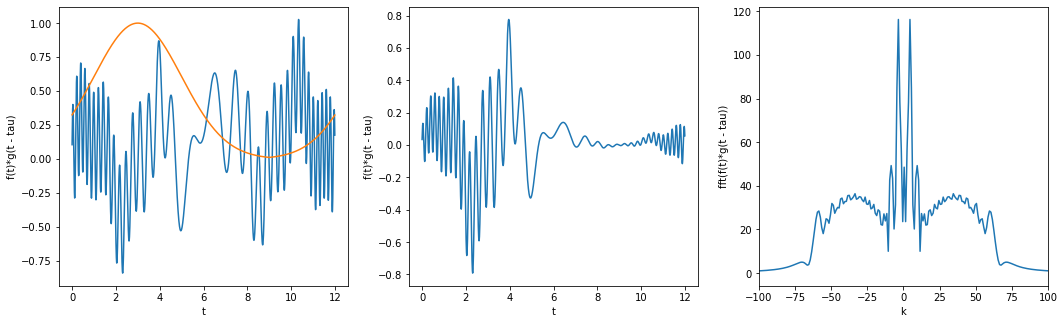

In [8]:
# I will define the shift by moving the filter to the right 

g_shift = 2*L/8

# numpy roll shifts a vector by number of indices so we need to figure out how many 
# indices we need g_vals to shift to amount to shifting the filter by g_shift

g_index_shift = int( N_grid*(g_shift/L) ) 

fg_vals = f_vals*np.roll(g_vals, g_index_shift) 

fig, ax = plt.subplots(1,3, figsize=(15, 5))

fig.tight_layout(pad=3.0)

ax[0].plot(grid, f_vals, grid, np.roll(g_vals, g_index_shift))
ax[0].set_xlabel('t')
ax[0].set_ylabel('f(t)*g(t - tau)')

ax[1].plot(grid, fg_vals)
ax[1].set_xlabel('t')
ax[1].set_ylabel('f(t)*g(t - tau)')

ax[2].plot( freq_grid, np.abs(np.fft.fftshift( np.fft.fft(fg_vals) )) )
ax[2].set_xlabel('k')
ax[2].set_ylabel('fft(f(t)*g(t - tau))')
ax[2].set_xlim(-100,100)


Lucky for you, all of this can be done automatically using the short time Fourier transform (STFT) function in Scipy's signal processing suite. 

**You will have to take some time to figure out how this function works.**

In [9]:
import scipy.signal as spsg

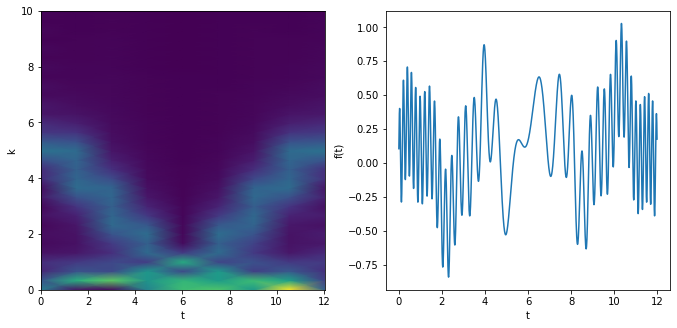

In [14]:
sigma =2

window_func = ('gaussian', int(sigma/L*N_grid)) # gaussian filter with standard deviation (window width) sigma 

# compute inputs for stft 

sampling_freq =  int(N_grid/L)   # how many samples in unit time

Number_of_time_segs = 4 # number of segments you want in time

kk, tt, zz =  spsg.stft( f_vals, sampling_freq, window=window_func, nperseg = N_grid/Number_of_time_segs) 


fig, ax = plt.subplots(1,2, figsize=(10, 5))

fig.tight_layout(pad=3.0)

ax[0].pcolormesh(tt, kk, np.abs(zz), shading='gouraud')
ax[0].set_xlabel('t')
ax[0].set_ylabel('k')
ax[0].set_ylim(0, 10)

ax[1].plot(grid, f_vals)
ax[1].set_xlabel('t')
ax[1].set_ylabel('f(t)')

plt.show()